In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

/home/nilabha/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=2000)
y_mnist = y.loc[X_mnist.index]

In [4]:
X_mnist = np.array(X_mnist)

In [5]:
transformer = MDS(n_components = 2, max_iter=100, n_init=1)

In [6]:
X_transformed = transformer.fit_transform(X_mnist)

/home/nilabha/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/tmp/ipykernel_28887/1554654923.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


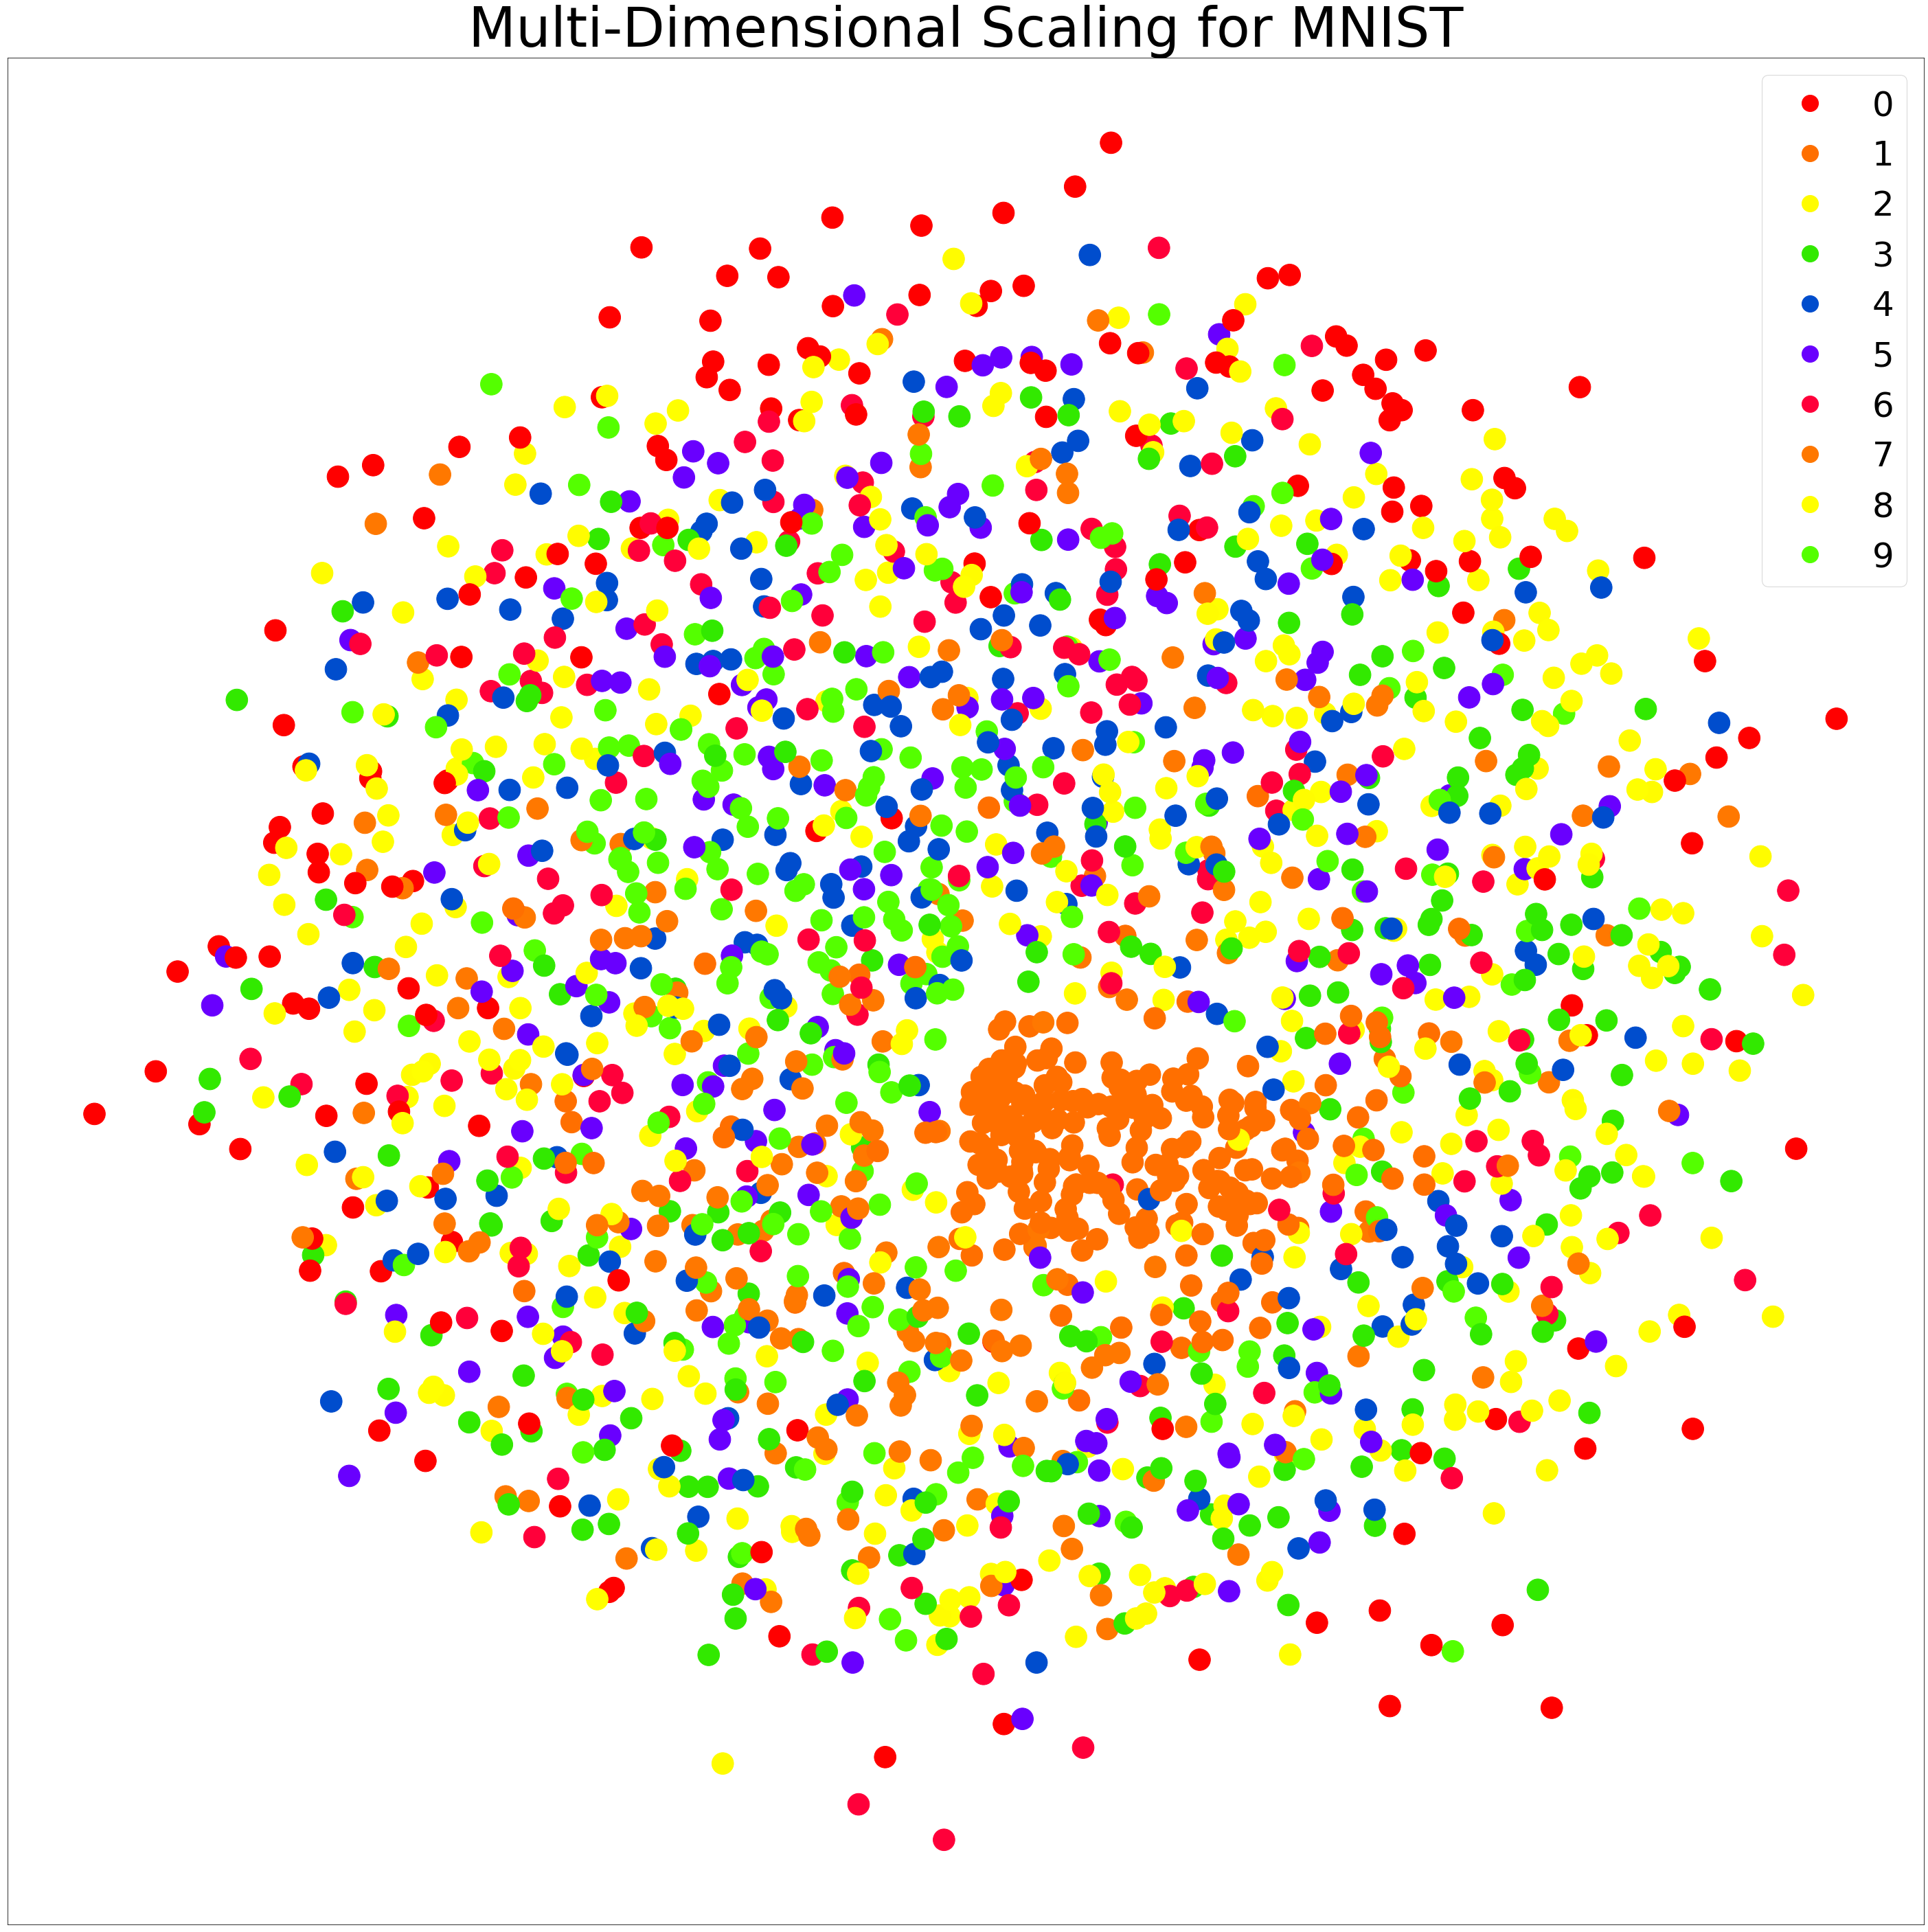

In [7]:
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()
sc = plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_mnist, s=1000)
plot.set_xticks(())
plot.set_yticks(())
plot.legend(*sc.legend_elements(), fontsize=50, markerscale=4)
plot.set_title("Multi-Dimensional Scaling for MNIST", size=80)
fig.savefig("plots/mds.png")
fig.show()